## Project description
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.

One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.

You should:

Learn to predict the probability of churn (for the upcoming month) for each customer

Draw up typical user portraits: select the most outstanding groups and describe their main features

Analyze the factors that impact churn most

Draw basic conclusions and develop recommendations on how to improve customer service:

- Identify target groups

- Suggest measures to cut churn

- Describe any other patterns you see with respect to interaction with customers

Project goal is to analyze customer profiles of Model Fitness chain and come up with a customer retention strategy in order to fight churn.

## Step 1. Download the data

In [1]:
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('/datasets/gym_churn_us.csv')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


(4000, 14)

In [3]:
data.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [4]:
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [ ]:
# Check for duplicates.
data.duplicated()

In [5]:
data.duplicated().sum()

0

## Conclusion
On this step we download the data. We check data for duplicates, no duplicates found.

The data types are proper, although could be reduced from int64 , this is not necessary because total data volume is quite small.

## Step 2. Carry out exploratory data analysis (EDA)

- Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
- Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
- Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
- Build a correlation matrix and display it.


In [6]:
# look at data:
for col in data.columns:
    temp_series = data[col].value_counts().sort_index().sort_values()
    print(temp_series)

0    1959
1    2041
Name: gender, dtype: int64
0     619
1    3381
Name: Near_Location, dtype: int64
1    1947
0    2053
Name: Partner, dtype: int64
1    1234
0    2766
Name: Promo_friends, dtype: int64
0     386
1    3614
Name: Phone, dtype: int64
6      833
12     960
1     2207
Name: Contract_period, dtype: int64
1    1649
0    2351
Name: Group_visits, dtype: int64
41      1
18      2
19      2
39      3
38     10
20     14
21     24
37     29
22     33
36     48
23     82
35     98
24    148
34    174
25    231
33    253
26    300
32    364
27    378
31    434
28    447
30    457
29    468
Name: Age, dtype: int64
0.148205      1
182.960514    1
183.078280    1
183.094659    1
183.110743    1
             ..
92.671903     1
92.682422     1
92.715931     1
92.025681     1
552.590740    1
Name: Avg_additional_charges_total, Length: 4000, dtype: int64
2.0       14
3.0       23
7.0       25
8.0       38
4.0       58
9.0       73
10.0      82
5.0      130
11.0     181
12.0     524
6.0   

In [7]:
#  Look at the dataset: mean values and standard deviation.
data.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Typical client is about 29 y.o., he/she probably has 6 month contract, live (or work) nearby, visiting Fitness about 2 times a month and spending about 150 USD a month for additional charges. It could be any of two genders, with almost equal probability.

In [8]:
# Look at the mean feature values in two groups: for those who left (churn) and for those who stayed.
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


We can see that some mean feature values differ for two groups. For those who stayed, means of 'Near Location', 'Partner', 'Promo Friends', 'Contract period', 'Group Visits', 'Age', 'Avg additional charges total', 'Month to end contract', 'Lifetime', 'Avg class frequency total', 'Avg class frequency current month' are higher than for those who churn. Means of 'gender' and 'Phone' does not differ considerably.

''

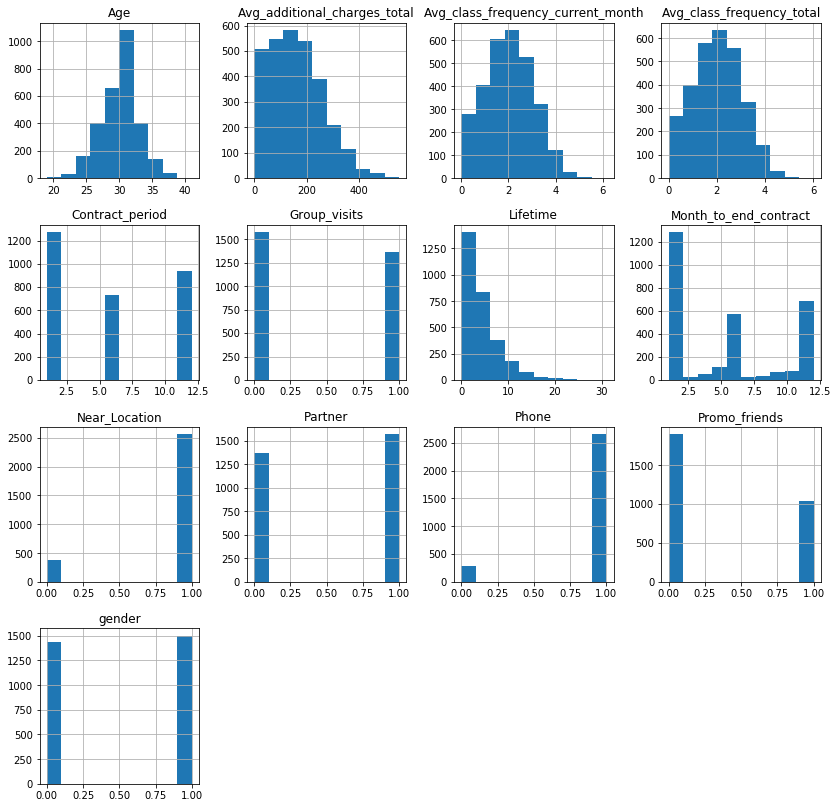

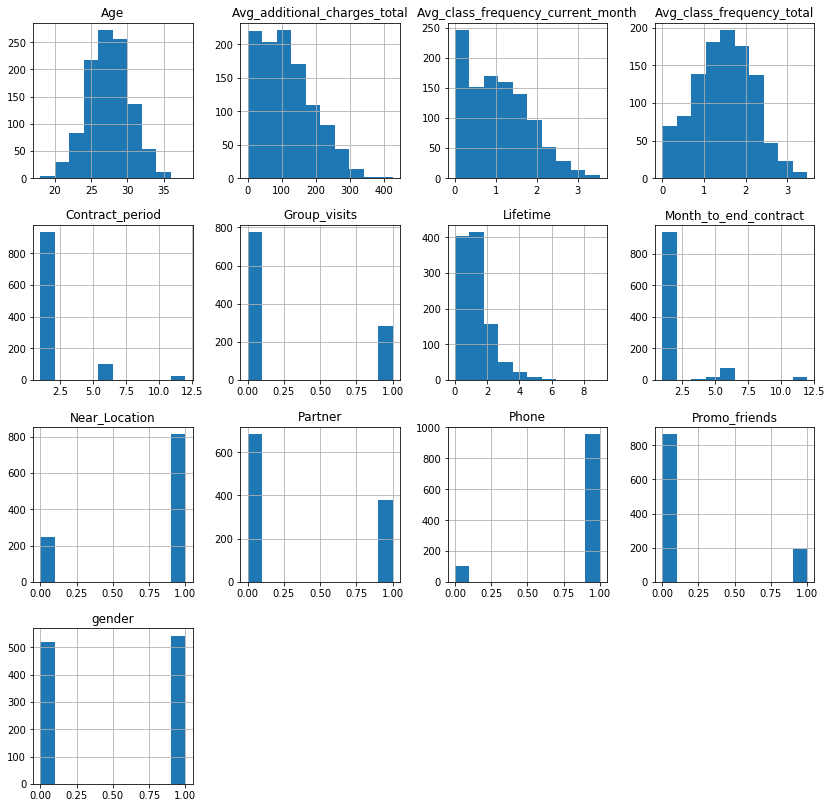

In [9]:
# Plot bar histograms and feature distributions for those who stayed - first bunch, 
# and for those who left (churn) - second bunch.
data.groupby('Churn').hist(figsize=(14,14))
""

We plot bar histograms and feature distributions for those who stayed (first bunch of bar histograms) and  for those who left (second bunch of bar histograms). Feature 'Age' has normal distribution for both groups. Features 'Avg additional charges total', 'Avg class frequency current month', 'Avg class frequency total' shows skewed normal distribution. 'Avg class frequency current month' for those who left demonstrates alarming peak on '0'. That must be very important feature so. 'Contract Period' could be telling a lot on user intentions, as we see predominant one-two-month contracts among those who left. On the contrary, we can see fair distribution of short and six-twelf-month contracts in those who stayed. Feature 'Group Visits' supports those who stayed, as well as feature 'Partner'. Feature 'Lifetime' naturally go longer for those who stayed. Feature 'Month to end contract' seem to just follow the 'Contract Period' feature. Features 'Near Location', 'Phone', 'Promo Friends' and 'Gender' seem to be insignificant and not influencing factors.

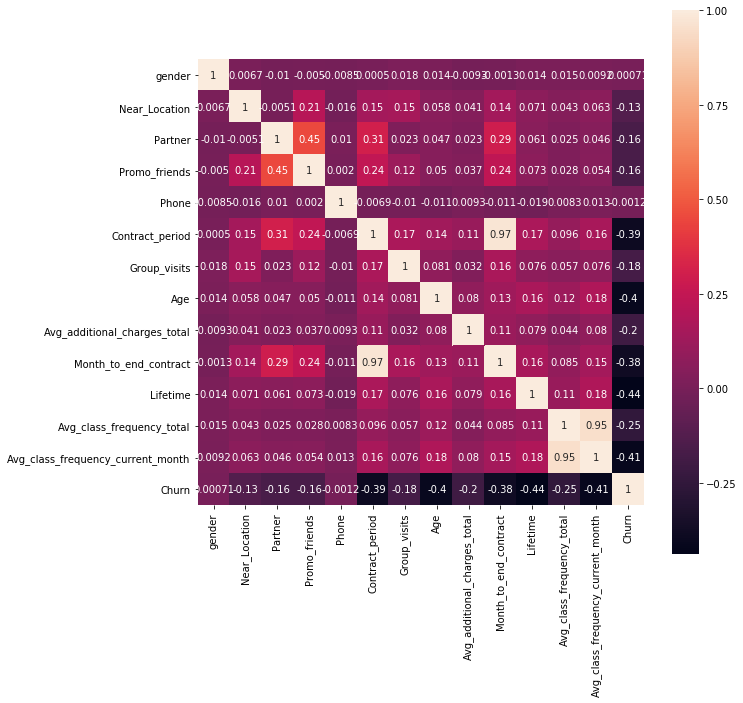

In [10]:
# build and render a correlation matrix
cm = data.corr() # calculate correlation matrix
fig, ax = plt.subplots(figsize=(10,10))

# plot an annotated heatmap for the correlation matrix
sns.heatmap(cm, annot = True, square = True)
plt.show()

We build a correlation matrix and display it in the form of heatmap. From this matrix we can see that there is a strong correlation between features 'Avg class frequency total'and 'Avg class frequency current month', namely, 0.95; and 'Month to end contract' and 'Contract period', 0.97. Other features do not demonstrate any considerable correlation.

## Conclusion

The data look good. There are no missing values, all min, max, means and standard deviation look meaningful, that means there are no outliers in the dataset provided. The data types are proper, although could be reduced from int64 , this is not necessary because total data volume is quite small.

We look at the mean feature values in two groups: for those who left (churn) and for those who stayed (using the groupby() method).

We plot bar histograms and feature distributions for those who stayed (first bunch of bar histograms) and for those who left (second bunch of bar histograms). Feature 'Age' has normal distribution for both groups. Features 'Avg additional charges total', 'Avg class frequency current month', 'Avg class frequency total' shows skewed normal distribution. 'Avg class frequency current month' for those who left demonstrates alarming peak on '0'. That must be very important feature so. 'Contract Period' could be telling a lot on user intentions, as we see predominant one-two-month contracts among those who left. On the contrary, we can see fair distribution of short and six-twelf-month contracts in those who stayed. Feature 'Group Visits' supports those who stayed, as well as feature 'Partner'. Feature 'Lifetime' naturally go longer for those who stayed. Feature 'Month to end contract' seem to just follow the 'Contract Period' feature. Features 'Near Location', 'Phone', 'Promo Friends' and 'Gender' seem to be insignificant and not influencing factors.

We build a correlation matrix and display it in the form of heatmap. From this matrix we can see that there is a strong correlation between features 'Avg class frequency total'and 'Avg class frequency current month', namely, 0.95; and 'Month to end contract' and 'Contract period', 0.97. Other features do not demonstrate any considerable correlation.

## Step 3. Build a model to predict user churn
Build a binary classification model for customers where the target feature is the user's leaving next month.

- Divide the data into train and validation sets using the train_test_split() function.
- Train the model on the train set with two methods:

  - logistic regression
  - random forest
- Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

Remember to indicate the random_state parameter when dividing data and defining the algorithm.

In [11]:
# divide the data into features (the X matrix) and a target variable (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create a StandardScaler object and apply it to the train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # train the scaler and transform the matrix for the train set

# apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

In [12]:
# define the model's algorithm Logistic Regression
model = LogisticRegression(random_state=0)

# train your model
model.fit(X_train, y_train)

# binary prediction
predictions = model.predict(X_test)

# print the studied metrics for the resulting prediction
print('Logistic Regression Model:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Logistic Regression Model:
Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [13]:
# define the model's algorithm Random Forest
model = RandomForestClassifier(random_state=0)

# train your model
model.fit(X_train, y_train)

# binary prediction
predictions = model.predict(X_test)

# print the studied metrics for the resulting prediction
print('Random Forest Model:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))   

Random Forest Model:
Accuracy: 0.91
Precision: 0.83
Recall: 0.78


## Conclusion

We build a binary classification model for customers where the target feature is the user's leaving next month.

We divide the data into train and validation sets using the train_test_split() function. We indicate the random_state = 0 parameter when dividing data and defining the algorithm. We train the model on the train set with two methods:

- logistic regression
- random forest

We evaluate accuracy, precision, and recall for both models using the validation data. We use them to compare the models. Logistic Regression Model (Accuracy: 0.93, Precision: 0.86, Recall: 0.83) gave better results than Random Forest Model (Accuracy: 0.91, Precision: 0.83, Recall: 0.78).

All metric for Logistic Regression Mode exceed ones for other model. I believe Recall is the most important metric for our task.

## Step 4. Create user clusters

Set aside the column with data on churn and identify object (user) clusters:

- Standardize the data.

- Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

- Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5).

- Look at the mean feature values for clusters. Does anything catch your eye?

- Plot distributions of features for the clusters. Do you notice anything?

- Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [14]:
# the standardization of data before passing it to the algorithm
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [15]:
# the linkage() function to build a matrix of distances based on the standardized feature matrix
linked = linkage(X_sc, method = 'ward')

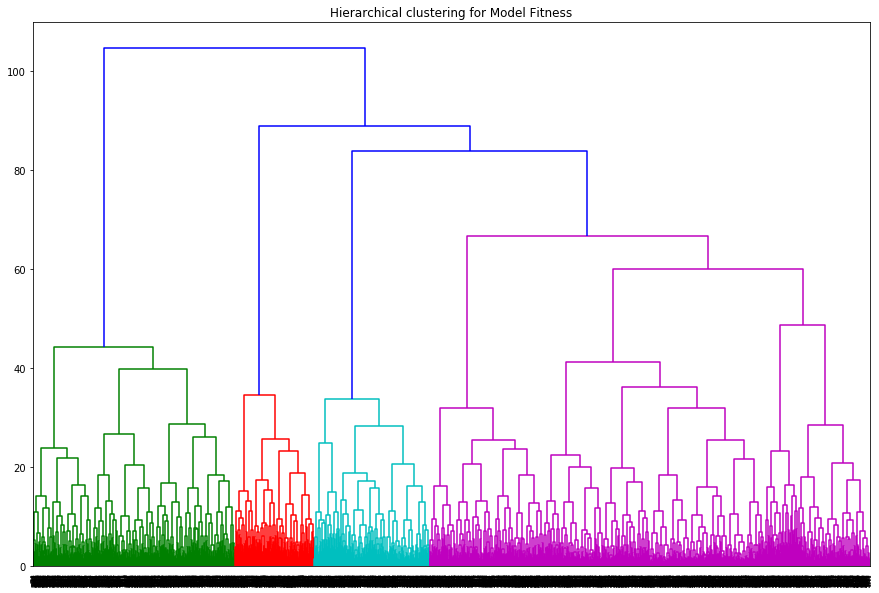

In [16]:
# plot a dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Model Fitness')
plt.show()

We plot a dendrogram to visualize clustering and use the plot to estimate the number of clusters we can single out. From the dendrogram we can see that 4 would be the optimal number of clusters.

In [24]:
# now launch the faster K-means algorithm with n_clusters = 5.
km = KMeans(n_clusters = 5, random_state=0) # setting the number of clusters as 5
labels = km.fit_predict(X_sc) # applying the algorithm to the data and forming a cluster vector

In [18]:
labels
len(list(labels))

4000

In [19]:
data['clusters'] = labels
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,clusters
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,2
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,4
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,4
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,2


In [20]:
data['clusters'].value_counts().sort_index().sort_values()

3     546
2     634
1     752
0     936
4    1132
Name: clusters, dtype: int64

In [21]:
# look at the mean feature values for clusters 
data.drop('Churn', axis = 1).groupby('clusters').mean().sort_values(by='clusters', ascending=True)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
clusters,,,,,,,,,,,,,
0,0.501068,0.944444,0.741453,0.489316,0.900641,11.878205,0.552350,29.913462,164.843651,10.869658,4.705128,1.991983,1.983475
1,0.593085,0.972074,0.281915,0.117021,0.894947,2.909574,0.484043,30.319149,162.953822,2.666223,5.180851,2.924785,2.929752
2,0.485804,1.000000,0.805994,1.000000,0.908517,3.102524,0.451104,29.078864,140.097349,2.881703,3.610410,1.682177,1.565955
3,0.494505,0.000000,0.465201,0.076923,0.915751,2.225275,0.214286,28.478022,134.126172,2.089744,2.805861,1.659607,1.469327
4,0.484099,1.000000,0.243816,0.010601,0.902827,1.976148,0.322438,28.227032,131.524179,1.893993,2.454064,1.306977,1.071938


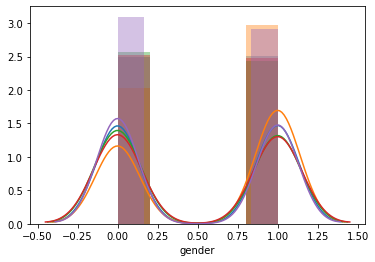

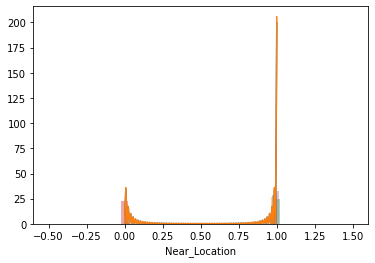

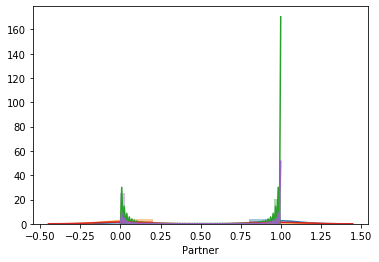

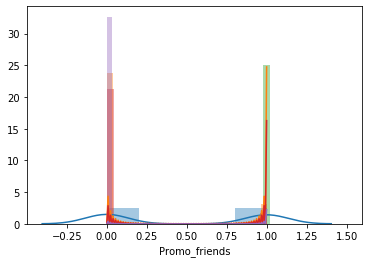

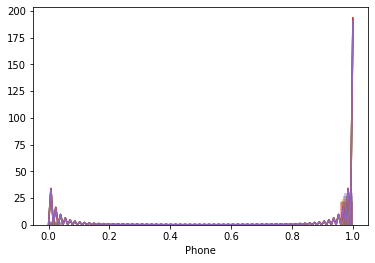

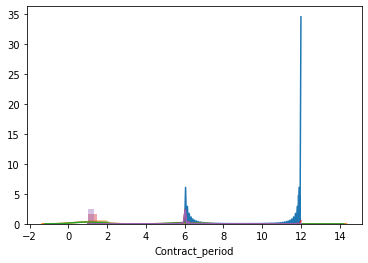

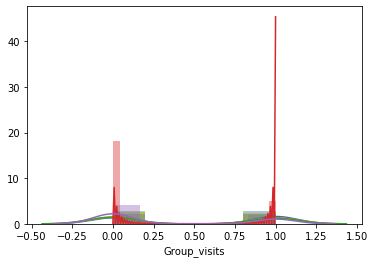

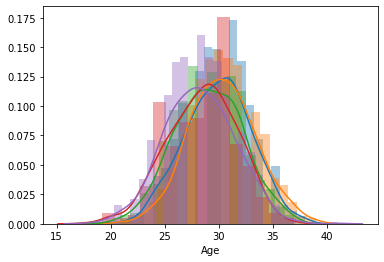

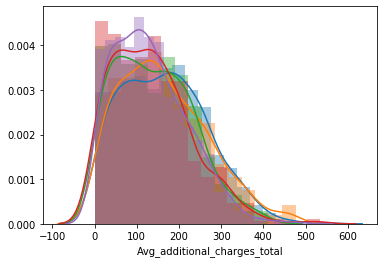

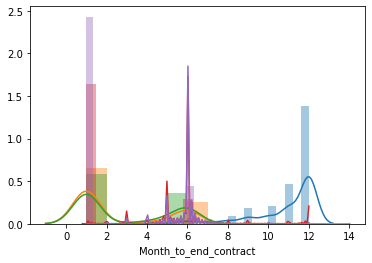

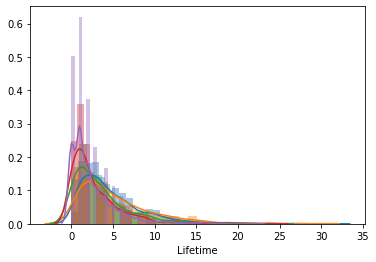

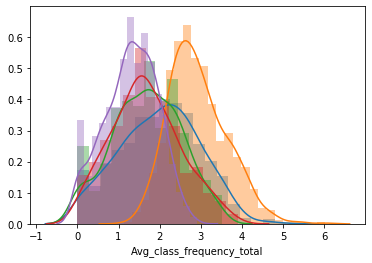

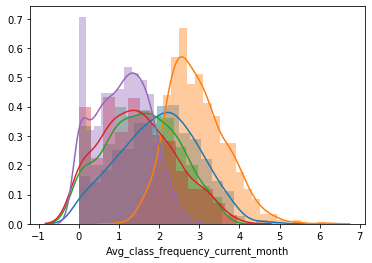

In [22]:
# plot distributions of features for the clusters
plt.figure()
sns.distplot(data[data['clusters'] == 0]['gender'])
sns.distplot(data[data['clusters'] == 1]['gender'])
sns.distplot(data[data['clusters'] == 2]['gender'])
sns.distplot(data[data['clusters'] == 3]['gender'])
sns.distplot(data[data['clusters'] == 4]['gender'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Near_Location'])
sns.distplot(data[data['clusters'] == 1]['Near_Location'])
sns.distplot(data[data['clusters'] == 2]['Near_Location'])
sns.distplot(data[data['clusters'] == 3]['Near_Location'])
sns.distplot(data[data['clusters'] == 4]['Near_Location'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Partner'])
sns.distplot(data[data['clusters'] == 1]['Partner'])
sns.distplot(data[data['clusters'] == 2]['Partner'])
sns.distplot(data[data['clusters'] == 3]['Partner'])
sns.distplot(data[data['clusters'] == 4]['Partner'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Promo_friends'])
sns.distplot(data[data['clusters'] == 1]['Promo_friends'])
sns.distplot(data[data['clusters'] == 2]['Promo_friends'])
sns.distplot(data[data['clusters'] == 3]['Promo_friends'])
sns.distplot(data[data['clusters'] == 4]['Promo_friends'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Phone'])
sns.distplot(data[data['clusters'] == 1]['Phone'])
sns.distplot(data[data['clusters'] == 2]['Phone'])
sns.distplot(data[data['clusters'] == 3]['Phone'])
sns.distplot(data[data['clusters'] == 4]['Phone'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Contract_period'])
sns.distplot(data[data['clusters'] == 1]['Contract_period'])
sns.distplot(data[data['clusters'] == 2]['Contract_period'])
sns.distplot(data[data['clusters'] == 3]['Contract_period'])
sns.distplot(data[data['clusters'] == 4]['Contract_period'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Group_visits'])
sns.distplot(data[data['clusters'] == 1]['Group_visits'])
sns.distplot(data[data['clusters'] == 2]['Group_visits'])
sns.distplot(data[data['clusters'] == 3]['Group_visits'])
sns.distplot(data[data['clusters'] == 4]['Group_visits'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Age'])
sns.distplot(data[data['clusters'] == 1]['Age'])
sns.distplot(data[data['clusters'] == 2]['Age'])
sns.distplot(data[data['clusters'] == 3]['Age'])
sns.distplot(data[data['clusters'] == 4]['Age'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Avg_additional_charges_total'])
sns.distplot(data[data['clusters'] == 1]['Avg_additional_charges_total'])
sns.distplot(data[data['clusters'] == 2]['Avg_additional_charges_total'])
sns.distplot(data[data['clusters'] == 3]['Avg_additional_charges_total'])
sns.distplot(data[data['clusters'] == 4]['Avg_additional_charges_total'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Month_to_end_contract'])
sns.distplot(data[data['clusters'] == 1]['Month_to_end_contract'])
sns.distplot(data[data['clusters'] == 2]['Month_to_end_contract'])
sns.distplot(data[data['clusters'] == 3]['Month_to_end_contract'])
sns.distplot(data[data['clusters'] == 4]['Month_to_end_contract'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Lifetime'])
sns.distplot(data[data['clusters'] == 1]['Lifetime'])
sns.distplot(data[data['clusters'] == 2]['Lifetime'])
sns.distplot(data[data['clusters'] == 3]['Lifetime'])
sns.distplot(data[data['clusters'] == 4]['Lifetime'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Avg_class_frequency_total'])
sns.distplot(data[data['clusters'] == 1]['Avg_class_frequency_total'])
sns.distplot(data[data['clusters'] == 2]['Avg_class_frequency_total'])
sns.distplot(data[data['clusters'] == 3]['Avg_class_frequency_total'])
sns.distplot(data[data['clusters'] == 4]['Avg_class_frequency_total'])
plt.show()

plt.figure()
sns.distplot(data[data['clusters'] == 0]['Avg_class_frequency_current_month'])
sns.distplot(data[data['clusters'] == 1]['Avg_class_frequency_current_month'])
sns.distplot(data[data['clusters'] == 2]['Avg_class_frequency_current_month'])
sns.distplot(data[data['clusters'] == 3]['Avg_class_frequency_current_month'])
sns.distplot(data[data['clusters'] == 4]['Avg_class_frequency_current_month'])
plt.show()


We plot distributions of features for the clusters. Distributions of features for different clusters mostly repeat their shapes but differ in quantity.

In [23]:
# calculate the churn rate for each cluster
data.groupby('clusters').mean().sort_values(by='Churn', ascending=False)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
clusters,,,,,,,,,,,,,,
4,0.484099,1.000000,0.243816,0.010601,0.902827,1.976148,0.322438,28.227032,131.524179,1.893993,2.454064,1.306977,1.071938,0.516784
3,0.494505,0.000000,0.465201,0.076923,0.915751,2.225275,0.214286,28.478022,134.126172,2.089744,2.805861,1.659607,1.469327,0.448718
2,0.485804,1.000000,0.805994,1.000000,0.908517,3.102524,0.451104,29.078864,140.097349,2.881703,3.610410,1.682177,1.565955,0.263407
1,0.593085,0.972074,0.281915,0.117021,0.894947,2.909574,0.484043,30.319149,162.953822,2.666223,5.180851,2.924785,2.929752,0.057181
0,0.501068,0.944444,0.741453,0.489316,0.900641,11.878205,0.552350,29.913462,164.843651,10.869658,4.705128,1.991983,1.983475,0.022436


## Conclusion

We set aside the column with data on churn and identify object (user) clusters.

We standardize the data.

We use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.  We use the resulting graph to estimate the number of clusters we can single out. From the dendrogram we can see that 4 would be the optimal number of clusters.

We train the clustering model with the K-means algorithm and predict customer clusters (we let the number of clusters be n=5). 

Look at the mean feature values for clusters. We notice that for some features ('gender', 'Phone') means almost do not differ, so these features are not so important and influencive. In the mean time others ('Age', 'Avg additional charges total', 'Contract Period', 'Month to end contract', 'Lifetime') differ quite a lot.

We plot distributions of features for the clusters. We notice that distributions of features for different clusters mostly repeat their shapes but differ in quantity.

We calculate the churn rate for each cluster (using the groupby() method). We find they are quite differ in terms of churn rate. Highest rate is 0.52 - cluster number 1, then 0.44 - cluster 4 and 0.27 - cluster 3. As for clusters 0 and 2, the churn rates are insignificant - 0.07 and 0.03, respectively. So we can expect clusters 1 and 4 are highly likely leaving. Cluster 3 is a little better, probably among undecided. As for clusters 0 and 2 (which gives us 46% of customers), we can consider them loyal. 

## Step 5. Overall conclusions

On the first step we download the data. We check data for duplicates, no duplicates found.

The data look good. There are no missing values, all min, max, means and standard deviation look meaningful, that means there are no outliers in the dataset provided. The data types are proper, although could be reduced from int64 , this is not necessary because total data volume is quite small.

We look at the mean feature values in two groups: for those who left (churn) and for those who stayed (using the groupby() method).

We plot bar histograms and feature distributions for those who stayed (first bunch of bar histograms) and for those who left (second bunch of bar histograms). Feature 'Age' has normal distribution for both groups. Features 'Avg additional charges total', 'Avg class frequency current month', 'Avg class frequency total' shows skewed normal distribution. 'Avg class frequency current month' for those who left demonstrates alarming peak on '0'. That must be very important feature so. 'Contract Period' could be telling a lot on user intentions, as we see predominant one-two-month contracts among those who left. On the contrary, we can see fair distribution of short and six-twelf-month contracts in those who stayed. Feature 'Group Visits' supports those who stayed, as well as feature 'Partner'. Feature 'Lifetime' naturally goes longer for those who stayed. Feature 'Month to end contract' seem to just follow the 'Contract Period' feature. Features 'Near Location', 'Phone', 'Promo Friends' and 'Gender' seem to be insignificant and not influencing factors.

We build a correlation matrix and display it in the form of heatmap. From this matrix we can see that there is a strong correlation between features 'Avg class frequency total'and 'Avg class frequency current month', namely, 0.95; and 'Month to end contract' and 'Contract period', 0.97. Other features do not demonstrate any considerable correlation.

We build a binary classification model for customers where the target feature is the user's leaving next month.

We divide the data into train and validation sets using the train_test_split() function. We indicate the random_state = 0 parameter when dividing data and defining the algorithm. We train the model on the train set with two methods:

- logistic regression
- random forest

We evaluate accuracy, precision, and recall for both models using the validation data. We use them to compare the models. Logistic Regression Model (Accuracy: 0.93, Precision: 0.86, Recall: 0.83) gave better results than Random Forest Model (Accuracy: 0.91, Precision: 0.83, Recall: 0.78).


We set aside the column with data on churn and identify object (user) clusters.

We standardize the data.

We use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram.  We use the resulting graph to estimate the number of clusters we can single out. From the dendrogram we can see that 4 would be the optimal number of clusters.

We train the clustering model with the K-means algorithm and predict customer clusters (we let the number of clusters be n=5). 

Look at the mean feature values for clusters. We notice that for some features ('gender', 'Phone') means almost do not differ, so these features are not so important and influencive. In the mean time others ('Age', 'Avg additional charges total', 'Contract Period', 'Month to end contract', 'Lifetime') differ quite a lot.

We plot distributions of features for the clusters. We notice that distributions of features for different clusters mostly repeat their shapes but differ in quantity.

We calculate the churn rate for each cluster (using the groupby() method). We find they are quite differ in terms of churn rate. Highest rate is 0.52 - cluster number 1, then 0.44 - cluster 4 and 0.27 - cluster 3. As for clusters 0 and 2, the churn rates are insignificant - 0.07 and 0.03, respectively. So we can expect clusters 1 and 4 are highly likely leaving. Cluster 3 is a little better, probably among undecided. As for clusters 0 and 2 (which gives us 46% of customers), we can consider them loyal. 

## Recommendations on working with customers

Clusters 1 and 4 show weakness in 'Partner', 'Promo Friends', 'Group visits'  features. In the meantime these clusters represent the youngest part (and massive 44%) of total Model Fitness customers. Probably they begin to fill bored, longly, lost and so wipe off in 2-3 months. We would recommend getting close to these customers first. 

- They probably could appreciate regular fitness events which involve lots of communication and competitive and team spirit. 

- Also special promotions like 'Promo Friends' should be more attractive, to suit these clusters budget. As their additional charges are smallest among all clusters, we can guess, that they, even if they will, cannot afford a personal fitness instructor. In that case we would recommend limited promotions like 'by 2 get 1 free', or 'pay today (for whatever package) and get 50% discount', and send notifications on them at least weekly to keep customers reminded. 

- Also, probably, proper refreshing of regular group classes program could also help them to stay entertained.

- As cluster 4 is weak in feature 'Near Location' while Model Fitness is a chain, it might be helpful to extend membership trough any gym club location (if not done yet), so the customer could choose the nearest one.

- As all of them have left their contact phone, it would be useful to conduct a survey to find out what needs to be improved.
